# Apredizado Supervisionado: Classificação c/ Random Forest

<img src="fluxo.png">

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1. Aquisição de dados

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) #transforma as labels de string para int

In [3]:
type(mnist)

sklearn.utils.Bunch

In [4]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [5]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [6]:
mnist.data.shape

(70000, 784)

In [7]:
mnist.target.shape

(70000,)

In [8]:
X,y = mnist['data'], mnist['target']

In [9]:
type(X)

pandas.core.frame.DataFrame

In [47]:
X.iloc[15000]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 15000, Length: 784, dtype: float64

In [12]:
linha = X.iloc[49554]
digito = np.array(linha).reshape(28,28)

In [13]:
digito

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

## 2. Visualização dos dados

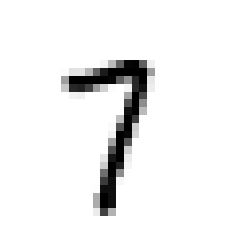

In [14]:
plt.imshow(digito, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [15]:
y[49554]

7

## 3. Pré-processamento

In [16]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [17]:
print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)

(10000, 784) (10000,) (60000, 784) (60000,)


In [23]:
index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[index], y_train.iloc[index]

In [24]:
index = np.random.permutation(10000)
X_test, y_test = X_test.iloc[index], y_test.iloc[index]

## 4. Seleçao e treinamento do modelo

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
predictions = rf_clf.predict(X_test)

In [28]:
acc = sum(predictions == y_test)/len(predictions)

In [29]:
print(acc)

0.9689


## 5. Ajustando o Modelo

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
rf_clf = RandomForestClassifier()

In [32]:
rf_clf.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [33]:
param_grid = { 
    'n_estimators': [200, 250, 300],
    'max_depth' : [6,8,10],
    'bootstrap': [False],
    'n_jobs': [-1]
}

In [34]:
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')

In [35]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [6, 8, 10],
                         'n_estimators': [200, 250, 300], 'n_jobs': [-1]},
             scoring='accuracy')

In [36]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 10, 'n_estimators': 300, 'n_jobs': -1}

In [37]:
rf_clf_best = RandomForestClassifier(max_depth= 10, n_estimators= 250, n_jobs= -1)
rf_clf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=250, n_jobs=-1)

In [38]:
predictions = rf_clf_best.predict(X_test)

In [39]:
acc = sum(predictions == y_test)/len(predictions)
print(acc)

0.9483


## 6. Avaliando o Modelo

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(predictions,y_test)

0.9483

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 968,    0,    0,    0,    0,    3,    3,    1,    4,    1],
       [   0, 1119,    4,    3,    0,    1,    3,    1,    4,    0],
       [   7,    0,  969,    9,   12,    0,    7,   17,    9,    2],
       [   1,    0,   15,  953,    1,   11,    0,   14,    9,    6],
       [   1,    1,    0,    0,  915,    1,    7,    1,    8,   48],
       [   6,    6,    0,   21,    4,  827,   11,    3,    6,    8],
       [  10,    3,    1,    0,    5,    6,  928,    0,    5,    0],
       [   1,    8,   23,    2,    4,    0,    0,  957,    5,   28],
       [   4,    2,    6,   10,    8,    5,    8,    4,  904,   23],
       [   6,    7,    3,   13,   16,    3,    1,    5,   12,  943]],
      dtype=int64)

<img src="matrix_confusao.png"> 

![confusion_matrix](https://miro.medium.com/max/2160/1*t1vf-ofJrJqtmam0KSn3EQ.png)

In [43]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, predictions, average='weighted')

0.9485740890965789

In [44]:
recall_score(y_test, predictions, average='weighted')

0.9483

In [45]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions, average='weighted')

0.9483042705346385

$Atividade (2.5):$ Utilizando o conjunto de dados MNIST realize as seguintes atividades:
<ol>
    <li>Tente alcançar uma acurácia acima de 97% no conjunto de teste com KNeighborsClassifier, ajustando os hiperparâmetros 'weights' e 'n_neighbors' com o grid search </li>
    <li>Escreva uma função que modifique apenas as imagens de treinamento do dataset deslocando um pixel em de cada imagem em qualquer direção (esquerda, direita, para cima ou para baixo), ou seja, para cada imagem no conjunto de treinamento, quatro imagens deslocadas são criadas e as adicione ao conjunto de treinamento. Em seguida, treine seu melhor classificador com o novo conjunto aumentado. Finalmente, meça o desempenho do modelo através das métricas acurácia, precisão, revocação e F1-score. Dica: a função shift() do módulo scipy.ndimage.interpolation pode ser útil para deslocar o pixel. </li>
</ol>